# CS 4501 Algorithmic Economics - Project 2

### Task I: Uncoupled No-Regret Learning Dynamics under Full Information

In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#### Question (a) - Pennies game

In [4]:
# An example template of the Multiplicative Weight Update Algorithm. You DO NOT have to use this template

# ------- Multiplicative Weight Update Algorithm -------#
def MWU(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (you may use any data struct):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):
        # Compute epsilon
        epsilon = compute_epsilon(t)
        gamma = min(1, math.sqrt( w_a.size * 2 * math.log(w_a.size) / (t) ) )

        a_action_prob = (1.0 - gamma) * w_a + gamma / w_a.size
        b_action_prob = (1.0 - gamma) * w_b + gamma / w_b.size
        
        a_arm = np.random.choice( w_a.size, 1, w_a / sum(w_a) )
        b_arm = np.random.choice( w_b.size, 1, w_b / sum(w_b) )

        a_cost = M_a[a_arm, b_arm]
        b_cost = M_b[a_arm, b_arm]

        a_estimatedReward = a_cost / a_action_prob[a_arm]
        w_a[a_arm] *= math.exp(-1 * epsilon * a_estimatedReward)

        b_estimatedReward = b_cost / b_action_prob[b_arm]
        w_b[b_arm] *= math.exp(-1 * epsilon * b_estimatedReward)

        last_conv_a = w_a[a_arm]
        last_conv_b = w_b[b_arm]

        avg_conv_a = ( avg_conv_a * (t - 1) + last_conv_a ) / t
        avg_conv_b = ( avg_conv_b * (t - 1) + last_conv_b ) / t

        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here




    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

In [5]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

In [82]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [251]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [258]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [268]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [271]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 


#### Question (b) - Rock-paper-scissors game

In [11]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

In [295]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [300]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [83]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [310]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [315]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 


#### Question (c)

In [74]:
# A function template to construct payoff matrices for the DIR game
# You DO NOT have to use this template
def construct_DIR(K, c):
    rho = max(K, c)
    M_a = np.zeros((K, K))
    M_b = np.zeros((K, K))
    
    for i in range(K):
        for j in range(K):
            if i <= (j+1):
                # something happens here
            else:
                # something happens here
                
            if j <= i:
                # something happens here
            else:
                # something happens here
    return M_a, M_b

**Choice 1: epsilon = 1/2**

In [295]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [300]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [83]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [310]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [315]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 


### Task II: Uncoupled No-Regret Learning Dynamics under Bandit Information

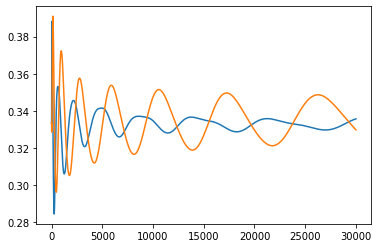

([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33401981301616646,
  0.33581136393957756,
  0.33816298934616024,
  0.3407948915535546,
  0.343503629207232,
  0.34619776889157433,
  0.3488757976291572,
  0.3515101353799415,
  0.35407917017701357,
  0.35652848563658623,
  0.3588577891657319,
  0.36106434918048397,
  0.36315977157221563,
  0.36515048326793337,
  0.3670399062226237,
  0.36884870314881596,
  0.37054215414031505,
  0.37211404530165165,
  0.3735669718534757,
  0.37495364709249895,
  0.37623015857421244,
  0.37740447126683613,
  0.3784721556910144,
  0.37942959912207147,
  0.3803336168241169,
  0.381183752376513,
  0.3819908309167668,
  0.38275685832782225,
  0.3834815379331029,
  0.3840981105004777,
  0.38468025660700217,
  0.38522784937721655,
  0.3857409233655703,
  0.38620762607482645,
  0.38662766780419383,
  0.38703132899965054,
  0.38734599003520703,
  0.3875749431631483,
  0.3877968

In [29]:
# An example template of the Multiplicative Weight Update Algorithm. 
# You DO NOT have to use this template

# ------- EXP3 Algorithm -------#
def EXP3(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (not using dict here :-D ):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.random.rand(k) * 3
    w_b = np.random.rand(k) * 3
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0

 

    
    # The game starts
    for t in range(T):
        # Compute epsilon
        epsilon = compute_epsilon(t)
        gamma = min(1, math.sqrt( w_a.size * 2 * math.log(w_a.size) / (t + 1) ) )

        a_exploit_prob = w_a/sum(w_a)
        b_exploit_prob = w_b/sum(w_b)

        a_action_prob = (1.0 - gamma) * a_exploit_prob + gamma / w_a.size
        b_action_prob = (1.0 - gamma) * b_exploit_prob + gamma / w_b.size
        
        a_arm = np.random.choice( w_a.size, 1, p =a_action_prob )
        b_arm = np.random.choice( w_b.size, 1, p=b_action_prob )
        
        # print(b_arm)
        # print(M_b[:])
        # print(M_b[:][b_arm])
        # print(M_b[:][b_arm].flatten())

        a_cost = np.dot(M_a[a_arm].flatten(), b_action_prob.flatten())
        b_cost = np.dot(M_b[:,b_arm].flatten(), a_action_prob.flatten())

        # print(M_b[:][b_arm].flatten())
        # print(b_cost)

        last_conv_a[t] = a_action_prob[0]
        last_conv_b[t] = b_action_prob[0]

        a_estimatedReward = a_cost / a_action_prob[a_arm]
        w_a[a_arm] *= math.exp( epsilon * a_estimatedReward)

        b_estimatedReward = b_cost / b_action_prob[b_arm]
        w_b[b_arm] *= math.exp( epsilon * b_estimatedReward)

        while sum(w_a) < 1:
            w_a *= 2
        while sum(w_a) > 100:
            w_a /= 2
        
        while sum(w_b) < 1:
            w_b *= 2
        while sum(w_b) > 100:
            w_b /= 2


        sum_p_a += last_conv_a[t]
        sum_p_b += last_conv_b[t]

        avg_conv_a[t] = sum_p_a / ( t + 1 )
        avg_conv_b[t] = sum_p_b / (t + 1)

        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here
    
    plt.plot(avg_conv_a)
    plt.plot(avg_conv_b)
    plt.show()

    #print(w_a)
    #print(w_b)

    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])


EXP3(M_a, M_b, compute_epsilon, T=30000)


#### Question (a) - Pennies game

In [16]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

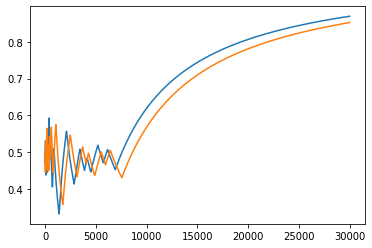

[1.47414362 0.        ]
[68.9405016  0.       ]


([0.5,
  0.5,
  0.4977320110882815,
  0.4909772344320492,
  0.48410451356656736,
  0.4782544060913662,
  0.4736780807383541,
  0.47054434643453197,
  0.4693371958999861,
  0.469805037818298,
  0.47201568508917274,
  0.4759816926971389,
  0.4816312238128676,
  0.4887392247659239,
  0.496390873197717,
  0.5042263172944099,
  0.5118054306539951,
  0.5187493579732346,
  0.5244764261908592,
  0.5283150565045504,
  0.5305751029477607,
  0.5310217237423391,
  0.5293271818482225,
  0.525389209202998,
  0.5192349597244013,
  0.5122073295408331,
  0.5047457405521872,
  0.4972148325017728,
  0.48964197609871063,
  0.48263494216953273,
  0.47653493397570057,
  0.4716345090789858,
  0.46846848951176895,
  0.4674188340114004,
  0.46885785030329086,
  0.4730092409040515,
  0.4787713734655194,
  0.48535369218276214,
  0.4933087927249089,
  0.5012027958764598,
  0.5087675546970629,
  0.5158339478699179,
  0.5222504484065567,
  0.5255087042885012,
  0.5268373032046479,
  0.52485232111385,
  0.5207712829

In [17]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 2: epsilon = 1/t**

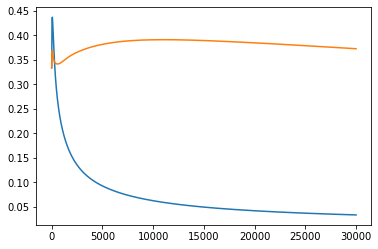

[0.05906439 3.85184899 1.83435372]
[0.89686581 1.19262177 0.58964996]


([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33472486248955746,
  0.338345929987402,
  0.3430588641234793,
  0.34818738016470563,
  0.3533885210152499,
  0.3584748838465927,
  0.36347170541100127,
  0.36819915078578963,
  0.37267569862145233,
  0.3768544552871307,
  0.3808644773003791,
  0.3845872124122165,
  0.3881530178339419,
  0.3915646555272157,
  0.39472295071759783,
  0.39764365402079066,
  0.40034185290023855,
  0.4028318226274932,
  0.40521663405142616,
  0.40750143493837915,
  0.40968998258181094,
  0.411738876504275,
  0.4136573790014941,
  0.41542437956133277,
  0.41704932998386857,
  0.41860823968989275,
  0.4200691873751338,
  0.42140920086573064,
  0.4226648572827345,
  0.4238125560649653,
  0.42488663528403975,
  0.4259188393547145,
  0.4269104391048003,
  0.42781265082584624,
  0.4286562824538924,
  0.42944450573592796,
  0.4301804911350182,
  0.43088769851890873,
  0.43152366258

In [11]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 3: epsilon = 1/(t^2/3)**

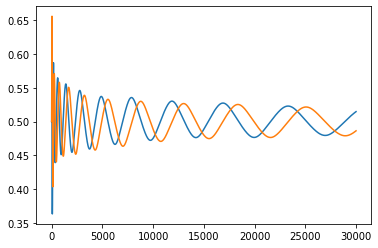

[2.13456675 0.39329853]
[1.86864776 0.33457424]


([0.5,
  0.5,
  0.5039691412761146,
  0.5157888304756129,
  0.5278363084331881,
  0.5385741755379062,
  0.5476903623183625,
  0.554837653078962,
  0.5605531196240772,
  0.5649609047255734,
  0.5681790936514839,
  0.5703130390342106,
  0.5714548971891863,
  0.5712591728294256,
  0.570226061431747,
  0.5681465403587915,
  0.5653354340209052,
  0.5618393503889062,
  0.5577117011080857,
  0.5530039122924781,
  0.5477672698241899,
  0.5422389661116385,
  0.5364960319728392,
  0.5303517288602687,
  0.5238578548946168,
  0.5173734067687907,
  0.5106404808216107,
  0.5037083077621366,
  0.4966253557369432,
  0.48946179978158455,
  0.4825289901918393,
  0.47582264798804985,
  0.469337948699589,
  0.46285564151720526,
  0.45660846271171496,
  0.4505883622649386,
  0.4447925621766815,
  0.4392132296151896,
  0.4338429560086719,
  0.42867763431703965,
  0.42371268657650374,
  0.41894322919414423,
  0.4143642052992227,
  0.4099704892652125,
  0.4057569680839434,
  0.4017186037317584,
  0.3978504800

In [18]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 4: 1/sqrt(t)**

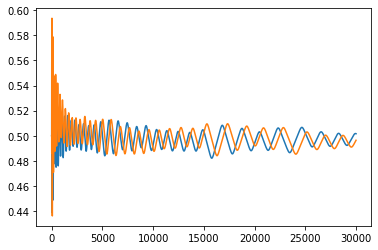

[3.10095582 5.78179274]
[40.59885852  1.81939182]


([0.5,
  0.5,
  0.5032812171206519,
  0.5132166965300906,
  0.5240621738520285,
  0.5345579014473091,
  0.5444746798025158,
  0.5535245334533633,
  0.5616611034812942,
  0.5687513515487364,
  0.5748925541682998,
  0.5800841070658992,
  0.5838596453574205,
  0.5866930013152213,
  0.5879754044124851,
  0.5883011611143782,
  0.5871919047045582,
  0.5847263039205027,
  0.5810831412478846,
  0.5765334212825979,
  0.5711693793985562,
  0.5649957961483123,
  0.5580850201034081,
  0.5505258263760592,
  0.5428745316296546,
  0.535245026556084,
  0.5273258456852787,
  0.5192255330681469,
  0.5113999953721154,
  0.5038913892482936,
  0.4966007959328276,
  0.4896781672283247,
  0.48314938844937727,
  0.4770131340689748,
  0.4712816724869906,
  0.4659692117244515,
  0.46107862065988275,
  0.45661266697024966,
  0.45257441234083384,
  0.4489871969605431,
  0.445876741447743,
  0.4432477640488298,
  0.44112880382998704,
  0.43952686034105337,
  0.43878383833469387,
  0.43858329734408735,
  0.43894701

In [19]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 5: epsilon = 1/(t^(1/3))**

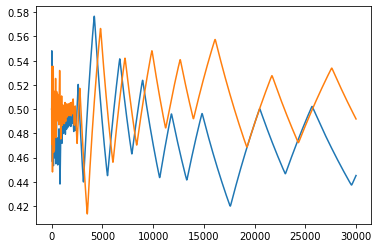

[8.55135952e+01 2.28646796e-12]
[7.01650126e-30 1.79720772e+00]


([0.5,
  0.5,
  0.500315327083331,
  0.50142220887836,
  0.5033615417615074,
  0.5062613437067466,
  0.5100868043393813,
  0.5146744959724594,
  0.5198119770993732,
  0.5250413644179105,
  0.53030298714419,
  0.53520736599378,
  0.5395492667631792,
  0.5431575972022703,
  0.5458656205616492,
  0.5475615927099546,
  0.548157454278993,
  0.5475276057745565,
  0.5454246264860465,
  0.5420791379002272,
  0.5375427394017749,
  0.5319317751012428,
  0.525484518536994,
  0.5184275481774626,
  0.5114604558339199,
  0.5046202678161104,
  0.498219059597862,
  0.4925616104823667,
  0.4879108213184447,
  0.4840397534732316,
  0.4810347665763873,
  0.4790430744095387,
  0.4785312202337204,
  0.47923439923860395,
  0.48117459775771493,
  0.4843312473768525,
  0.48822791560299,
  0.4926138941294011,
  0.49733191787952435,
  0.5022470545754187,
  0.507483299149968,
  0.5125889306486618,
  0.5174755756850048,
  0.521879161063507,
  0.5258954152577421,
  0.5294163797417272,
  0.5323728190933439,
  0.534

In [20]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=100000)

#### Question (b) - Rock-paper-scissors game

In [21]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

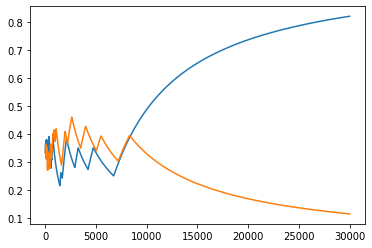

[1.18519647 0.         0.        ]
[ 0.         59.03282028  0.        ]


([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33380176156305164,
  0.33503847085535504,
  0.33670382436970614,
  0.3385070741116686,
  0.34054002206759737,
  0.3427529187598501,
  0.34509432832170894,
  0.34755816148583,
  0.35008267916608127,
  0.35229012073942434,
  0.3541153245749491,
  0.3558901363464894,
  0.35761584606574637,
  0.3592945642789099,
  0.3607948003298465,
  0.36198242956002996,
  0.3631378517025915,
  0.36399711254591066,
  0.3646118534734067,
  0.3648443853241768,
  0.3649371884339696,
  0.3649000009508764,
  0.3641353343695447,
  0.36257701512174745,
  0.36105376298220837,
  0.3596033958547199,
  0.35827361824343185,
  0.35710349853283346,
  0.3553110660883277,
  0.35377061966630474,
  0.35186919471938716,
  0.34968356746924784,
  0.34783312318311954,
  0.34597597407622316,
  0.3438694578010521,
  0.34156450160599583,
  0.3395237810637417,
  0.3377440359611128,
  0.3362045987

In [22]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 2: epsilon = 1/t**

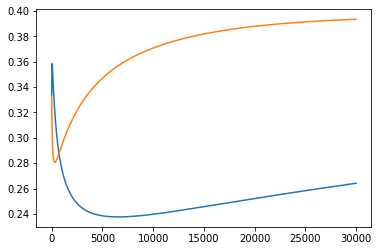

[1.06468786 1.2997766  1.21609975]
[2.25716998 1.16645396 2.16228611]


([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33370112033296623,
  0.33465851215980874,
  0.33590589953964173,
  0.33728773176829485,
  0.33871980767886894,
  0.34012676781775,
  0.3415120614762533,
  0.34286128025071366,
  0.34410867179869037,
  0.3452780780673772,
  0.34634819364584957,
  0.347323973027969,
  0.34826557994192364,
  0.34913966800344864,
  0.34992986432975703,
  0.35064177157981913,
  0.3512812509301616,
  0.3519017142284242,
  0.3524748939837988,
  0.35298621520248924,
  0.35348411732982304,
  0.3539426074533302,
  0.3543895654674441,
  0.35478524698454483,
  0.3551719674393497,
  0.35551209410895096,
  0.35584541292096494,
  0.35617203439547684,
  0.35645758612803996,
  0.3567175849660787,
  0.3569734547355421,
  0.35719380746779356,
  0.3573807967731222,
  0.35756619153717956,
  0.3577208983521162,
  0.3578749261518986,
  0.35800065589611524,
  0.3581264952823177,
  0.358226327

In [23]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 3: epsilon = 1/(t^2/3)**

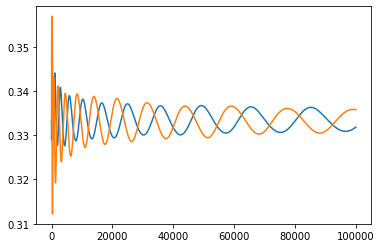

([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3332326215321735,
  0.3329685758808646,
  0.33261713071689586,
  0.33225109045197143,
  0.3318542309232877,
  0.33148596855710805,
  0.3311629025433063,
  0.3308898724782284,
  0.3306635787399168,
  0.3304837153277832,
  0.33028081125071407,
  0.33012660959885864,
  0.32994947158933785,
  0.32982092484108083,
  0.3297385152613258,
  0.32963145959259527,
  0.3295026920192872,
  0.3294201907959597,
  0.32931616166627675,
  0.3291925925712611,
  0.3291145633186054,
  0.32901804855033095,
  0.3289651684841848,
  0.32895275149419334,
  0.3289210222205802,
  0.32892702841816723,
  0.3289681206755059,
  0.3290426132334782,
  0.3290967298449992,
  0.32913201229268724,
  0.32919481304715514,
  0.329239374636738,
  0.3293135442422457,
  0.3294154768665392,
  0.3295429543411475,
  0.32965250119993045,
  0.32974579900509976,
  0.32982413861547305,
  0.329888474260

In [32]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=100000)

**Choice 4: 1/sqrt(t)**

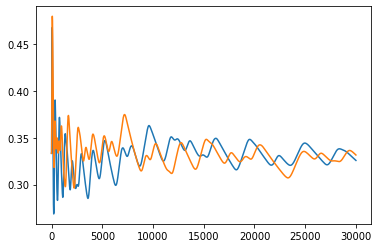

[ 1.62900848 15.04713479  5.54134185]
[0.05343382 0.8815757  3.86673679]


([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33400600488317217,
  0.33575797454456735,
  0.3381145225200368,
  0.3407293642039527,
  0.34362139381583917,
  0.3467396278601438,
  0.35015293153393845,
  0.35373914728480077,
  0.3574944419711719,
  0.36142374511925573,
  0.3655312488233078,
  0.36939686595672433,
  0.3732447459157849,
  0.3770543742714752,
  0.3808059914755878,
  0.38445634028717907,
  0.38800889058168286,
  0.39182257539955834,
  0.3955046773745869,
  0.3994156679964427,
  0.40303100786861645,
  0.4064932503187641,
  0.40978006204565387,
  0.41290442020214874,
  0.41587807518011305,
  0.41871169064141944,
  0.4218902276187142,
  0.42470770544523767,
  0.4271292118613122,
  0.4293803066742607,
  0.43147201791657813,
  0.433395317730181,
  0.4351606761902076,
  0.43677779627460056,
  0.43825568653584035,
  0.4400646548108398,
  0.44173854686818104,
  0.44369127520752333,
  0.44549830

In [25]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)

**Choice 5: epsilon = 1/(t^(1/3))**

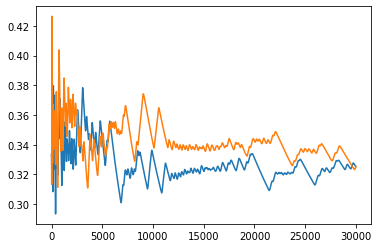

[2.27175414e-01 4.23494125e-12 3.36663999e+00]
[2.63712191e+01 1.21271197e-02 3.25961403e-01]


([0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.33309322138508823,
  0.3324754116598945,
  0.3317003563166583,
  0.3308931836790315,
  0.3299314651362869,
  0.3288509023487965,
  0.32787739688405443,
  0.3273681957323084,
  0.32674853637148615,
  0.3261027101484927,
  0.3254334262463571,
  0.32514775472437096,
  0.3250237886000834,
  0.3251627626660573,
  0.32524836589160067,
  0.32548786535938773,
  0.3257990395202795,
  0.32597813759039,
  0.32597971212401594,
  0.3265359925310366,
  0.32711626256145754,
  0.32776045349106725,
  0.3290836526425145,
  0.3310980077869712,
  0.33309710968879935,
  0.33447536956189705,
  0.336499242533843,
  0.33846061959792884,
  0.3396634602666143,
  0.34079162172190786,
  0.34124242273830074,
  0.3416269624814898,
  0.3419474765874191,
  0.3421844749928041,
  0.3418801993871846,
  0.3415154507267497,
  0.34145657697901544,
  0.3409331266119393,
  0.3403335588922269

In [26]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
EXP3(M_a, M_b, compute_epsilon, T=30000)